In [52]:
# Idea: function that returns number of observation (amount of time) metric is above a healthy threshold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("c:/Users/zdelk/OneDrive - Southface/Documents/datasets/jan23_iaq_edited.csv")

#- Most thresholds were pulled from https://www.airgradient.com/ 
#- 
thresholds = {
    "Temp" : (30,75),
    "Hum": (30,60),
    "CO2" : (0,1000),
    "PM2.5" : (0, 15)
}



In [25]:
col = "Temp"
test_thresh = thresholds[col]
upper, lower = thresholds[col]

In [27]:
test_col = data.iloc[:,2]
test_col_thresh = []
hum_thresh = 58
for i in range(len(test_col)):
    if test_col[i] > hum_thresh:
        test_col_thresh.append(1)
    else:
        test_col_thresh.append(0)

In [46]:
thresh_test = [75, 58]
test_df = data.iloc[:,1:3]
nested_list = []

for col in test_df.columns:
    print(col)
    use_thresh = thresholds[col]
    test_df_thresh = []
    print("Test 1: " , len(test_df[col]))
    for i in range(len(test_df[col])):
        if test_df[col][i] > use_thresh:
            test_df_thresh.append(1)
        else:
            test_df_thresh.append(0)
    nested_list.append(test_df_thresh)
    
thresh_df = pd.DataFrame(nested_list).T
thresh_df.columns = test_df.columns


Temp
Test 1:  337
Hum
Test 1:  337


In [2]:
#- one threshold
nested_list = []
for col in data.columns:
    if col in thresholds:
        threshold = thresholds[col]
        val_list = []
        for i in range(len(data[col])):
            if data[col][i] > threshold:
                val_list.append(1)
            else:
                val_list.append(0)
                
        nested_list.append(val_list)

    else:
        id_list = data[col]
    
binary_thresh_df = pd.DataFrame(nested_list).T
bin_thresh_full = pd.concat([id_list, binary_thresh_df], axis=1)

bin_thresh_full.columns = data.columns

In [53]:
#- threshold range
nested_list = []
for col in data.columns:
    if col in thresholds:
        lower, upper = thresholds[col]
        val_list = []
        for i in range(len(data[col])):
            if data[col][i] >= lower and data[col][i] <= upper:
                val_list.append(1)
            else:
                val_list.append(0)
                
        nested_list.append(val_list)

    else:
        id_list = data[col]
    
binary_thresh_df = pd.DataFrame(nested_list).T
bin_thresh_full = pd.concat([id_list, binary_thresh_df], axis=1)

bin_thresh_full.columns = data.columns

In [54]:
thresholds = {
    "Temp": {
        "Healthy": (68, 75),
        "Warning": (64.4, 78.8),
        "Unhealthy": (60.8, 82.4)
    },
    "Hum": {
        "Healthy": (30, 60),
        "Warning": (25, 65),
        "Unhealthy":(20, 70)
    },
    "CO2": {
        "Healthy": (0, 800),
        "Warning": (0, 1000),
        "Unhealthy": (0, 1500)
    },
    "PM2.5": {
        "Healthy": (0, 15),
        "Warning": (0, 35),
        "Unhealthy":(0, 55)
    }
}

In [55]:
nested_list = []
for col in data.columns:
    if col in thresholds:
        col_thresholds = thresholds[col]
        val_list = []
        for value in data[col]:
            category = None
            for label, (lower, upper) in col_thresholds.items():
                if lower <= value <= upper:
                    category = label
                    break
                else:
                    category = "Dangerous"
            val_list.append(category)
        nested_list.append(val_list)
    else:
        id_list = data[col]
        

classified_df = pd.DataFrame(nested_list).T
multi_class_df = pd.concat([id_list, classified_df], axis=1)

multi_class_df.columns = data.columns

           Temp   Hum   CO2  PM2.5
Dangerous     1     0     5     84
Healthy     157  5738  6972   6832
Unhealthy  2635     1    91     34
Warning    4408  1462   133    251


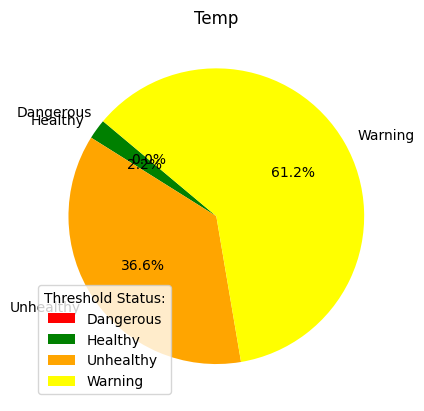

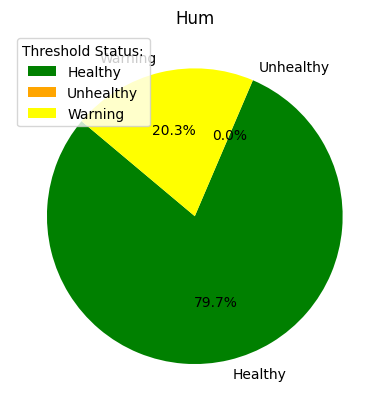

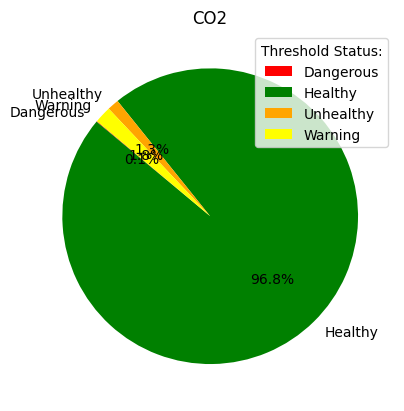

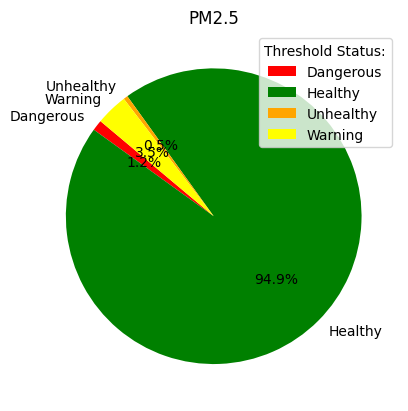

In [56]:
#- Full frequency table
freq_table = multi_class_df.iloc[:,1:].apply(lambda col: col.value_counts()).fillna(0).astype(int)
print(freq_table)
category_colors = {
    "Healthy": "green",
    "Warning": "yellow",
    "Unhealthy": "orange",
    "Dangerous": "red"
}

for col in freq_table:
    filter_col = {k: v for k,v in freq_table[col].items() if v>0}
    
    labels = list(filter_col.keys())
    values = list(filter_col.values())
    
    colors = [category_colors[label] for label in labels]
    
    plt.pie(values, labels=labels, colors=colors,
            autopct='%1.1f%%', startangle=140)
    plt.legend(title = "Threshold Status:")
    plt.title(freq_table[col].name)
    plt.show()

In [30]:
#- Percent (%) of time  within Healthy threshold range
print(round(bin_thresh_full.iloc[:,1:].sum() / bin_thresh_full.iloc[:,1:].count() * 100, 2))

Temp     36.80
Hum      85.76
CO2      47.77
PM2.5    62.31
dtype: float64


Temp
0    213
1    124
Name: Temp, dtype: int64


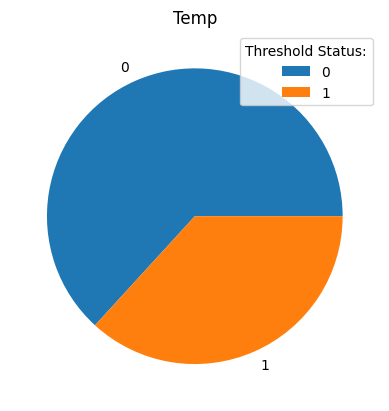

   Temp  Hum  CO2  PM2.5
0   213   48  176    127
1   124  289  161    210


In [29]:
# Frequency Table and Pie chart work
freq_temp = bin_thresh_full['Temp'].value_counts()
freq_temp.name = 'Temp'
print(freq_temp)
plt.pie(freq_temp, labels=freq_temp.keys())
plt.legend(title = "Threshold Status:")
plt.title(freq_temp.name)
plt.show()



   Temp  Hum  CO2  PM2.5
0   213   48  176    127
1   124  289  161    210


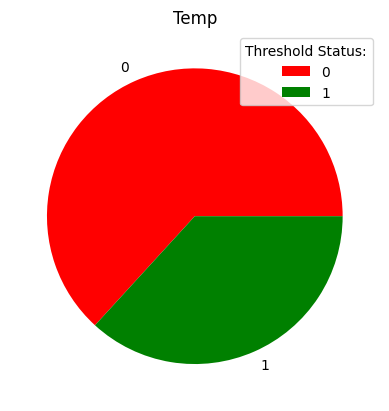

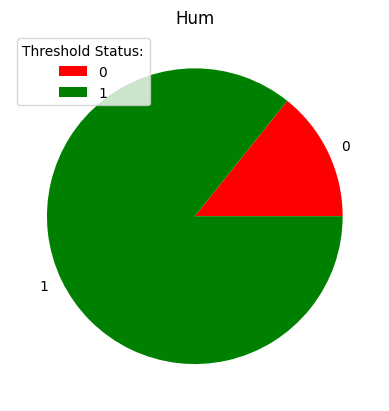

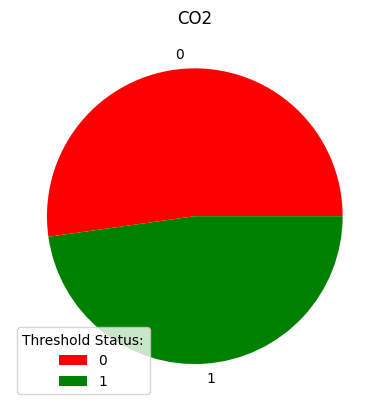

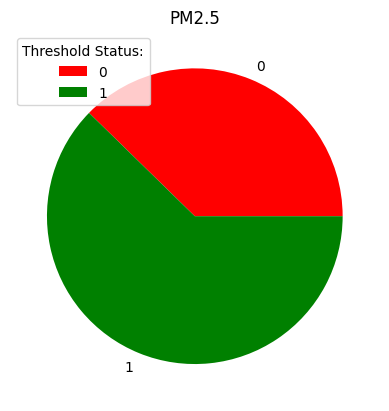

In [34]:
#- Full frequency table
freq_table = bin_thresh_full.iloc[:,1:].apply(lambda col: col.value_counts()).fillna(0).astype(int)
print(freq_table)
for col in freq_table:
    plt.pie(freq_table[col], labels=freq_table[col].keys(), colors= ["r","g"])
    plt.legend(title = "Threshold Status:")
    plt.title(freq_table[col].name)
    plt.show()